RICH Alignment Demo
====

The LHCb RICH detectors use mirrors to focus and redirect Cherenkov photons; misalignment of these mirrors results in shifted Cherenkov rings:

<img src="img/rings.png">

The LHCb RICH mirror alignment procedure is relatively simple: we can see the tracking spot and the Cherenkov ring- all we need to do is move the mirrors until the tracking spot is in the centre of the ring.

Practically, we measure the shift by plotting the Cherenkov opening angle as a function of azimuthal angle:

<img src="img/r_phi.png">

If the mirrors are aligned, r(Φ) = a constant.

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt

import rich_ring
import ring_plots

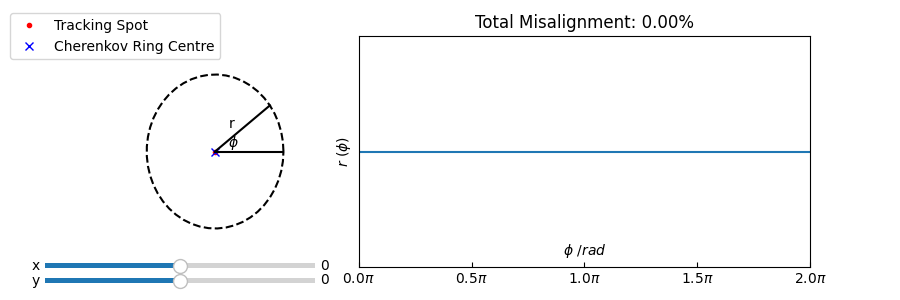

In [5]:
"""
Plot the diagram

"""


def plot_ring():
    """
    Create an interactive plot of a Cherenkov ring
    
    n points around the circle (higher => higher resolution, but slower to update)
    
    """
    My_Ring = rich_ring.Ring(0.0, 0.0)
    n = 25
    figsize = (9.0, 3.0)

    # Create some empty plots
    ax, ax2 = ring_plots._empty_figure(figsize)
    ring, ring_centre, horizontal, angled_line, phi_label, r_label = ring_plots._setup_diagram(
        ax
    )
    line, title = ring_plots._setup_plot(ax2)

    # Create sliders that will allow us to move the Cherenkov ring around
    x_slider, y_slider = ring_plots._create_sliders(*My_Ring.centre())

    # Fill the plots in
    ring_centre_coords = My_Ring.centre()
    ring_boundary_coords = My_Ring.boundary(n)
    r, phi = My_Ring.misalignment(n)
    ring_plots._draw_diagram(
        ring_boundary_coords,
        ring_centre_coords,
        r[0],
        n,
        horizontal,
        angled_line,
        ring,
        ring_centre,
        r_label,
        phi_label,
    )
    ring_plots._draw_plot(r, phi, ring_centre_coords, n, line, title)

    def update(val):
        """
        Move all the components of the plot according to the values of the sliders
        
        """
        x, y = x_slider.val, y_slider.val
        My_Ring.move(x, y)

        ring_boundary_coords = My_Ring.boundary(n)
        r, phi = My_Ring.misalignment(n)

        ring_plots._draw_diagram(
            ring_boundary_coords,
            (x, y),
            r[0],
            n,
            horizontal,
            angled_line,
            ring,
            ring_centre,
            r_label,
            phi_label,
        )
        ring_plots._draw_plot(r, phi, (x, y), n, line, title)

    # When our slider changes, update the plot
    x_slider.on_changed(update)
    y_slider.on_changed(update)

    plt.show()


plot_ring()

Small Angle Approximation
----

The current RICH setup makes use of a small angle approximation to perform the alignment:

<img src="img/small_angle.png">


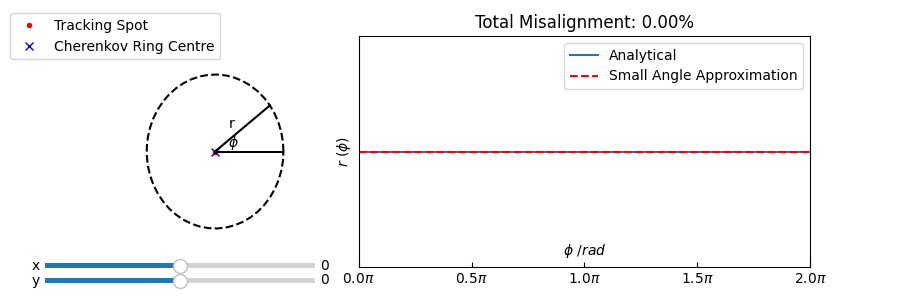

In [6]:
"""
Plot a diagram showing the small angle approximation

"""
from numpy import arctan2, ones, cos
from math import sqrt


def small_angle_plot():
    """
    Create an interactive plot of a Cherenkov ring with the small angle approximation overlaid
    
    """
    # Lots of re used code here
    x, y = 0.0, 0.0
    My_Ring = rich_ring.Ring(x, y)
    n = 25
    figsize = (9.0, 3.0)

    # Create some empty plots
    ax, ax2 = ring_plots._empty_figure(figsize)
    ring, ring_centre, horizontal, angled_line, phi_label, r_label = ring_plots._setup_diagram(
        ax
    )
    line, title = ring_plots._setup_plot(ax2)

    # Create sliders that will allow us to move the Cherenkov ring around
    x_slider, y_slider = ring_plots._create_sliders(*My_Ring.centre())

    # Fill the plots in
    ring_centre_coords = My_Ring.centre()
    ring_boundary_coords = My_Ring.boundary(n)
    r, phi = My_Ring.misalignment(n)
    ring_plots._draw_diagram(
        ring_boundary_coords,
        ring_centre_coords,
        r[0],
        n,
        horizontal,
        angled_line,
        ring,
        ring_centre,
        r_label,
        phi_label,
    )
    ring_plots._draw_plot(r, phi, ring_centre_coords, n, line, title)

    # Create a line showing the small angle approximation also
    r0 = ones(n * 2)
    capital_phi = arctan2(y, x)
    capital_theta = sqrt(y ** 2 + x ** 2)
    small_angle_r = r0 + capital_theta * cos(phi - capital_phi)
    small_angle_line, = ax2.plot(phi, small_angle_r, "r--")

    # Legend
    ax2.legend((line, small_angle_line), ("Analytical", "Small Angle Approximation"))

    def update(val):
        """
        Move all the components of the plot according to the values of the sliders
        
        """
        x, y = x_slider.val, y_slider.val
        My_Ring.move(x, y)

        ring_boundary_coords = My_Ring.boundary(n)
        r, phi = My_Ring.misalignment(n)

        ring_plots._draw_diagram(
            ring_boundary_coords,
            (x, y),
            r[0],
            n,
            horizontal,
            angled_line,
            ring,
            ring_centre,
            r_label,
            phi_label,
        )

        capital_phi = arctan2(y, x)
        capital_theta = sqrt(y ** 2 + x ** 2)
        small_angle_r = r0 + capital_theta * cos(phi - capital_phi)
        small_angle_line.set_data(phi, small_angle_r)

        ring_plots._draw_plot(r, phi, (x, y), n, line, title)

    # When our slider changes, update the plot
    x_slider.on_changed(update)
    y_slider.on_changed(update)

    plt.show()


small_angle_plot()

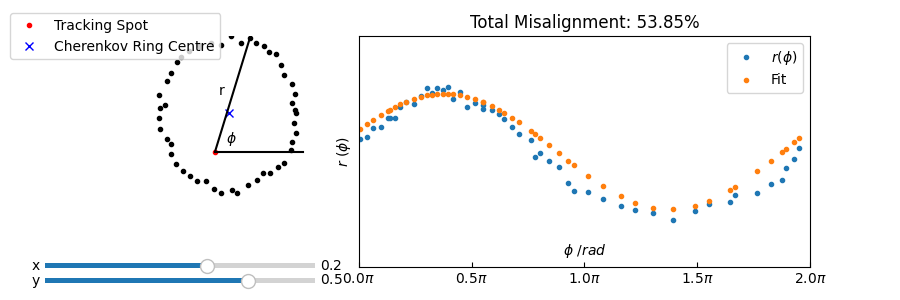

In [7]:
import importlib
import matplotlib.pyplot as plt
import rich_ring
import ring_plots
import fitting
import numpy as np

importlib.reload(rich_ring)
importlib.reload(ring_plots)
importlib.reload(fitting)

centre = 0.2, 0.5
spot = 0, 0
N = 50
noise = 0.1

Noisy = rich_ring.Noisy_Ring(*centre)

# Create some empty plots
figsize = 9.0, 3.0
ax, ax2 = ring_plots._empty_figure((figsize))
ring, ring_centre, horizontal, angled_line, phi_label, r_label = ring_plots._setup_diagram(
    ax, "k."
)
line, title = ring_plots._setup_plot(ax2, ".", "")

# Create sliders that will allow us to move the Cherenkov ring around
x_slider, y_slider = ring_plots._create_sliders(*Noisy.centre())

# Fill the plots in
ring_centre_coords = Noisy.centre()
ring_boundary_coords = Noisy.boundary(N)
r, phi = Noisy.misalignment(N)
ring_plots._draw_diagram(
    ring_boundary_coords,
    ring_centre_coords,
    r[0],
    N,
    horizontal,
    angled_line,
    ring,
    ring_centre,
    r_label,
    phi_label,
)
ring_plots._draw_plot(r, phi, ring_centre_coords, N, line, title)

def approx(angle, A, B):
    return 1+A*np.cos(angle-B)

A, B = fitting.ring_fit(phi, r)
approx_line, = ax2.plot(phi, approx(phi, A, B))
approx_line.set_linestyle("")
approx_line.set_marker(".")

ax2.legend((line, approx_line), (r"$r(\phi)$", "Fit"))


def update(val):
    """
    Move all the components of the plot according to the values of the sliders
        
    """
    x, y = x_slider.val, y_slider.val
    Noisy.move(x, y)

    ring_boundary_coords = Noisy.boundary(N)
    r, phi = Noisy.misalignment(N)

    ring_plots._draw_diagram(
            ring_boundary_coords,
            (x, y),
            r[0],
            N,
            horizontal,
            angled_line,
            ring,
            ring_centre,
            r_label,
            phi_label,
    )

    ring_plots._draw_plot(r, phi, (x, y), N, line, title)
    approx_line.set_ydata(approx(phi, *fitting.ring_fit(phi, r)))

# When our slider changes, update the plot
x_slider.on_changed(update)
y_slider.on_changed(update)


plt.show()